In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [3]:
people = pd.read_csv("../data/adult.csv", index_col=[0])
people = people.replace("?", pd.NA).dropna()
valid_salaries = ["<=50K", ">50K"]
people["salary"].isin(valid_salaries)
valid_salaries_K = range(10, 1000)
people["salary K$"].isin(valid_salaries_K)


0        True
1        True
2        True
3        True
4        True
         ... 
32556    True
32557    True
32558    True
32559    True
32560    True
Name: salary K$, Length: 30162, dtype: bool

# Task 1
Print the count of men and women in the dataset.

In [24]:
print((people["sex"] == "Male").sum())
print((people["sex"] == "Female").sum())

20380
9782


# Task 2
Find the average age of men in dataset

In [22]:
people[people["sex"] == "Male"]["age"].mean()

39.18400392541707

# Task 3
Get the percentage of people from Poland (native-country)

In [12]:
poland_count = (people["native-country"] == "Poland").sum()
poland_count = poland_count / len(people) * 100
poland_count

0.18566408063125786

# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [24]:
higher_50K = people[people["salary"] == ">50K"]
less_50K = people[people["salary"] == "<=50K"]
higher_50K["age"].std()
less_50K["age"].std()

13.464631257161633

# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [33]:
without_education = people[~people["education"].isin(["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"])]
high_paid = without_education[without_education["salary"] == ">50K"]
len(high_paid)

3178

# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [37]:
stat = people.groupby("education")["age"].describe()
stat

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,820.0,37.897561,16.225795,17.0,23.0,36.0,52.0,90.0
11th,1048.0,32.363550,15.089307,17.0,18.0,28.5,43.0,90.0
12th,377.0,32.013263,14.373710,17.0,19.0,28.0,41.0,79.0
1st-4th,151.0,44.622517,14.929051,19.0,33.0,44.0,56.0,81.0
5th-6th,288.0,41.649306,14.754622,17.0,28.0,41.0,53.0,82.0
7th-8th,557.0,47.631957,15.737479,17.0,34.0,49.0,60.0,90.0
9th,455.0,40.303297,15.335754,17.0,28.0,38.0,53.0,90.0
Assoc-acdm,1008.0,37.286706,10.509755,19.0,29.0,36.0,44.0,90.0
Assoc-voc,1307.0,38.246366,11.181253,19.0,30.0,37.0,45.0,84.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [68]:
married_higher_50K = people[(people["marital-status"].str.startswith("Married")) & (people["salary"] == ">50K")].shape[0]
non_married_higher_50K = people[~(people["marital-status"].str.startswith("Married")) & (people["salary"] == ">50K")].shape[0]
married_less_50K = people[(people["marital-status"].str.startswith("Married")) & (people["salary"] == "<=50K")].shape[0]
non_married_less_50K = people[~(people["marital-status"].str.startswith("Married")) & (people["salary"] == "<=50K")].shape[0]
married_ratio = married_higher_50K / married_less_50K
non_married_ratio = non_married_higher_50K / non_married_less_50K
if married_ratio > non_married_ratio:
    print("Married people have won")
else:
    print("Non-married people have won")

Married people have won


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [73]:
people_max_hours = people[people["hours-per-week"] == people["hours-per-week"].max()]
people_max_hours.shape[0]

78

# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

<Figure size 1200x800 with 0 Axes>

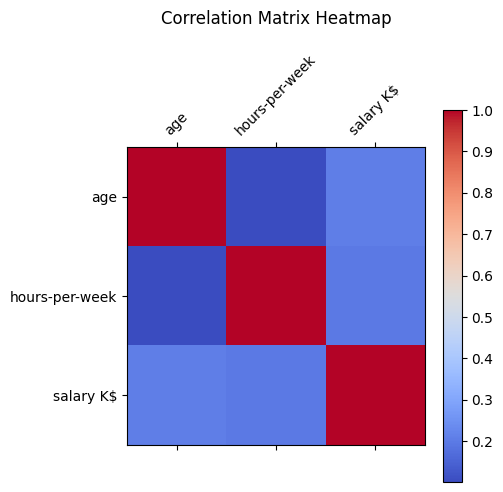

In [81]:
correlation = people.corr()
plt.figure(figsize=(12, 8))
cax = plt.matshow(correlation, cmap='coolwarm')
plt.colorbar(cax)

plt.xticks(np.arange(len(correlation.columns)), correlation.columns, rotation=45)
plt.yticks(np.arange(len(correlation.columns)), correlation.columns)

plt.title("Correlation Matrix Heatmap", pad=20)
plt.show()